In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

In [29]:
df = pd.read_csv('housing.data', delim_whitespace=True, header =None)

In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [31]:
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [32]:
df.columns = col_name


In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [34]:
# Exploratory Data Analysis(EDA)

In [35]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


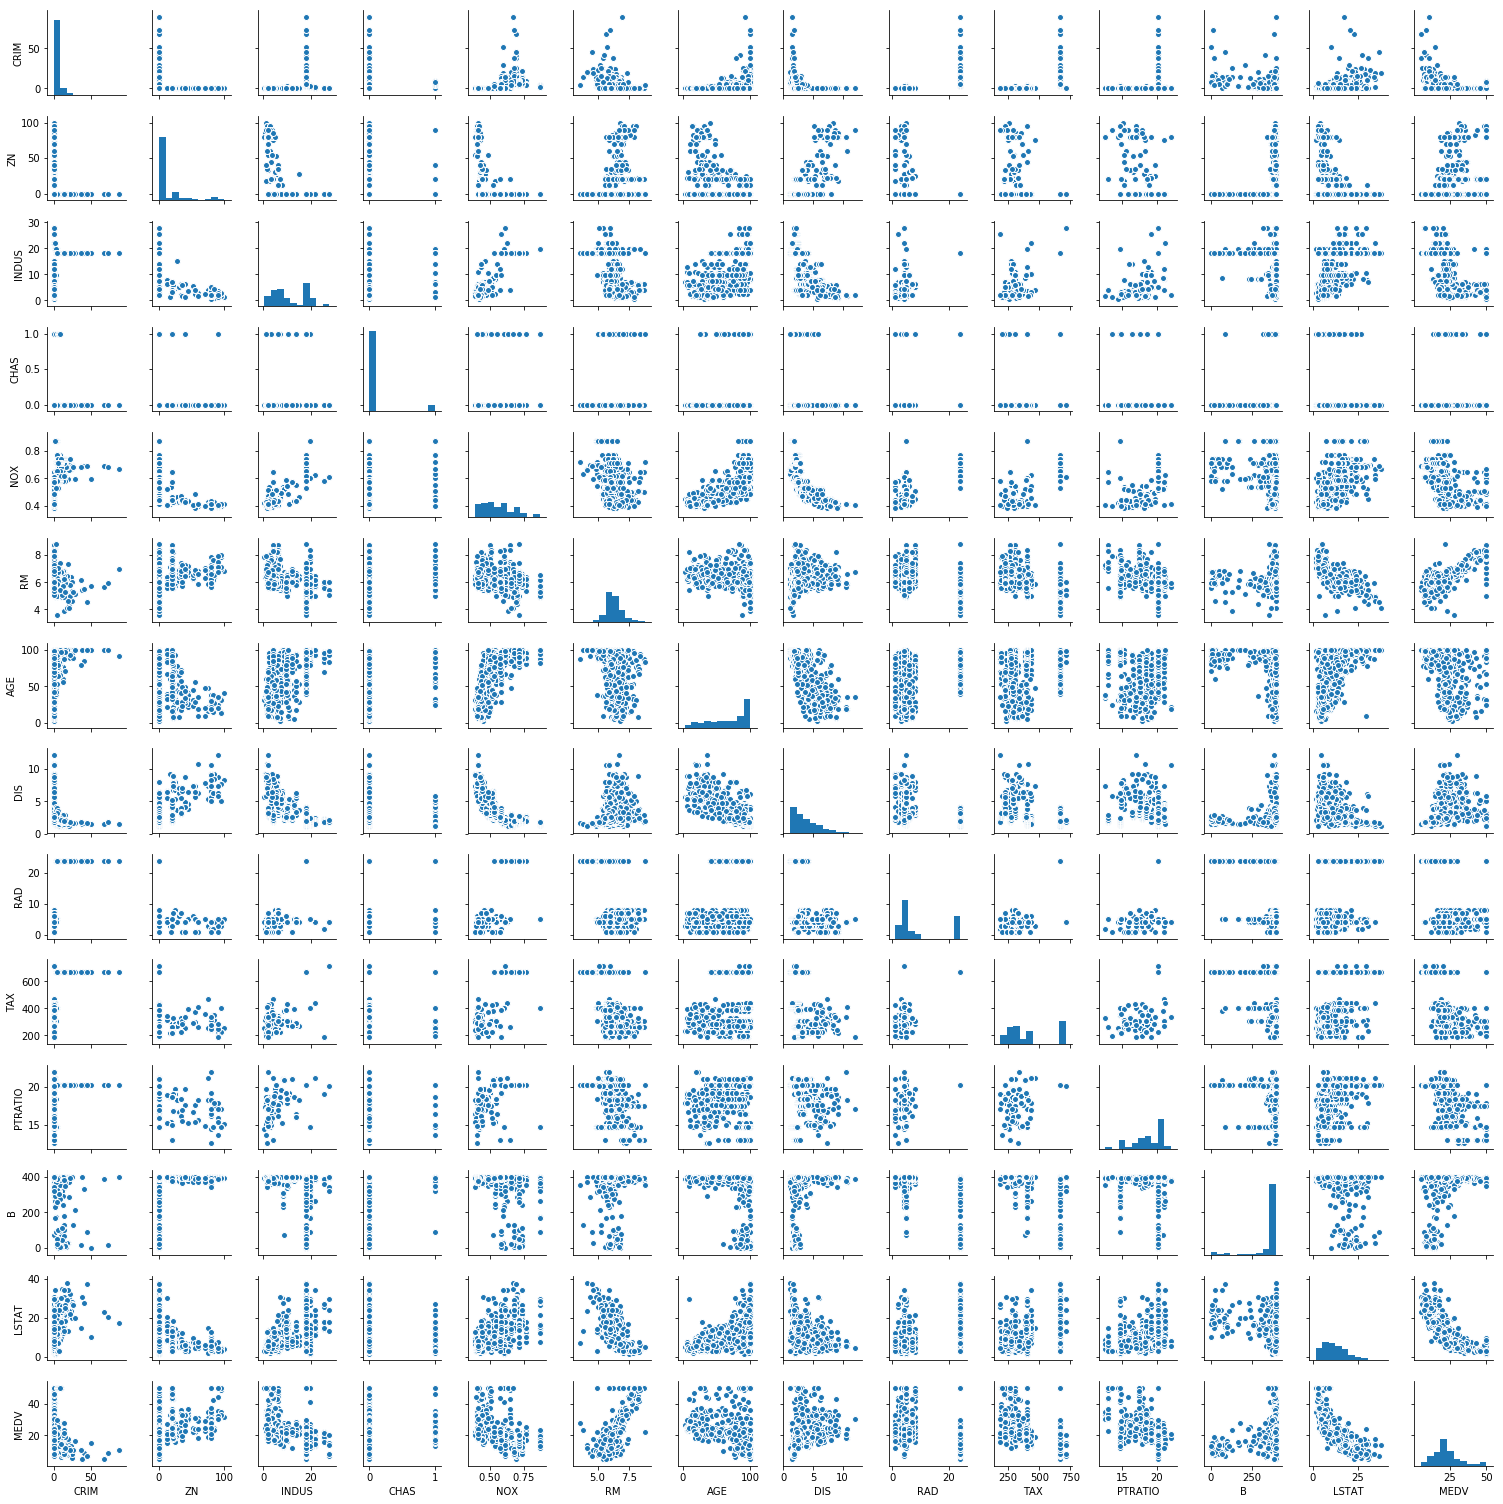

In [36]:
sns.pairplot(df, size=1.5)
plt.show()

In [37]:
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']

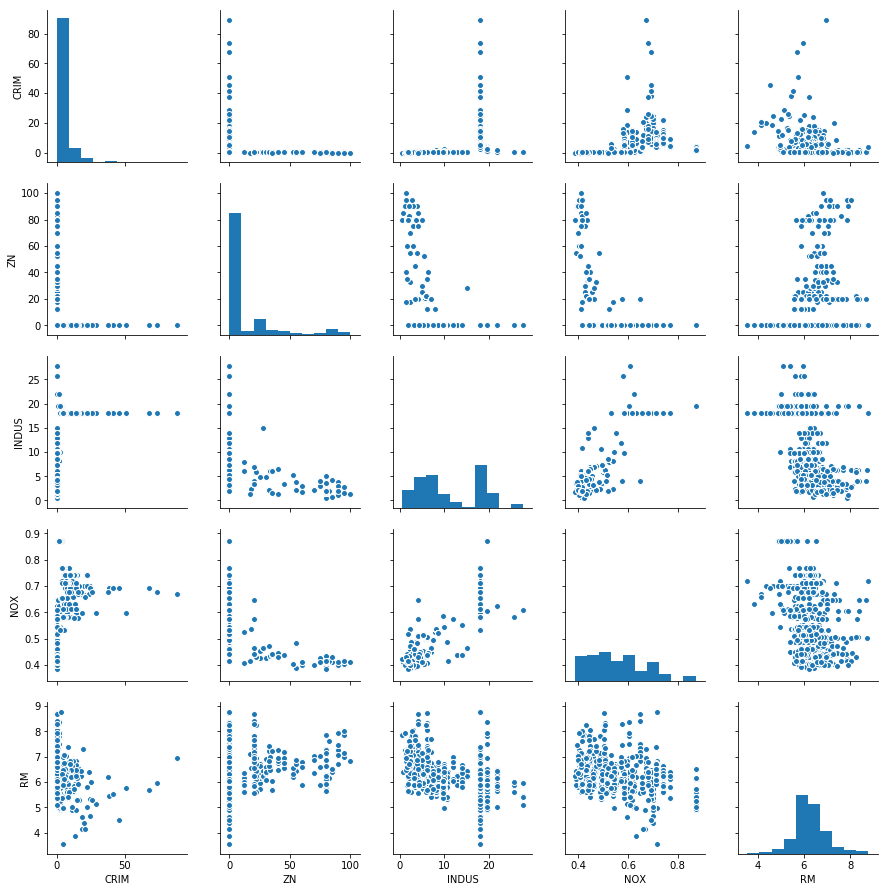

In [38]:
sns.pairplot(df[col_study], size=2.5);
plt.show()

In [39]:
# Correlation Analysis and Feature Selection

In [40]:
pd.options.display.float_format = '{:,.2f}'.format

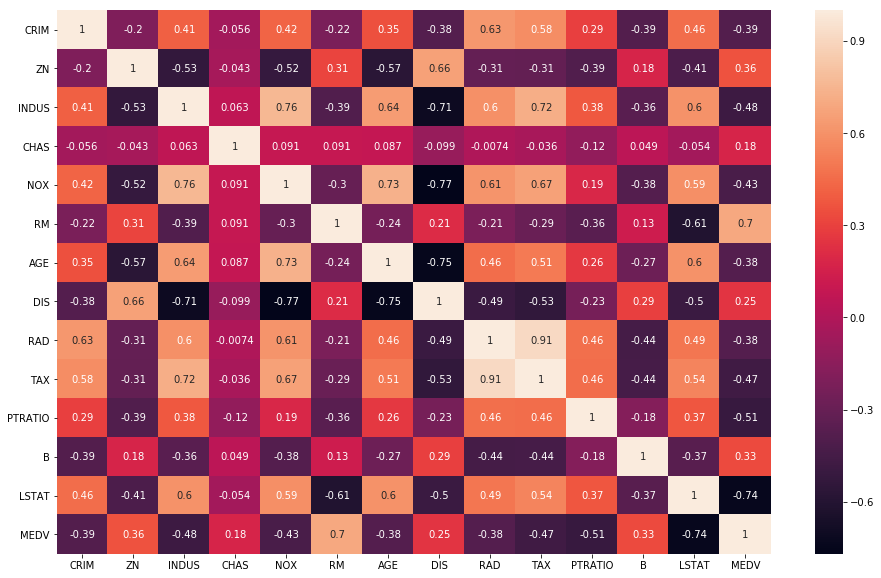

In [41]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

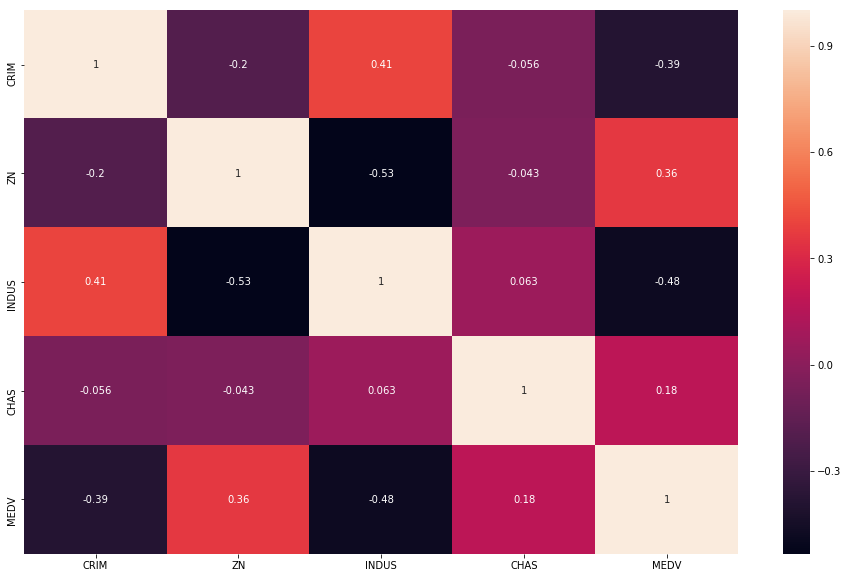

In [42]:
plt.figure(figsize=(16,10))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), annot = True)
plt.show()

In [43]:
#Linear Regression with Scikit-Learn

In [44]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [45]:
X = df['RM'].values.reshape(-1,1)

In [46]:
y = df['MEDV'].values

In [47]:
model = LinearRegression()

In [48]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
model.coef_

array([ 9.10210898])

In [50]:
model.intercept_

-34.670620776438554

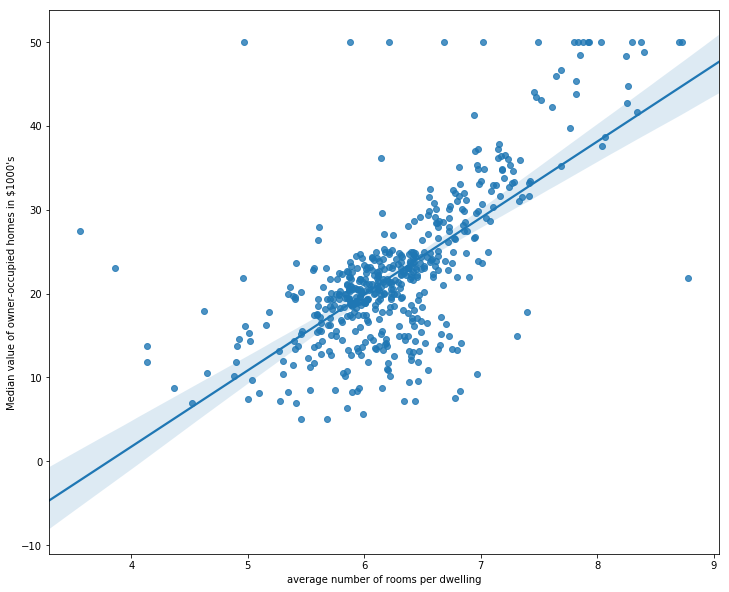

In [51]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

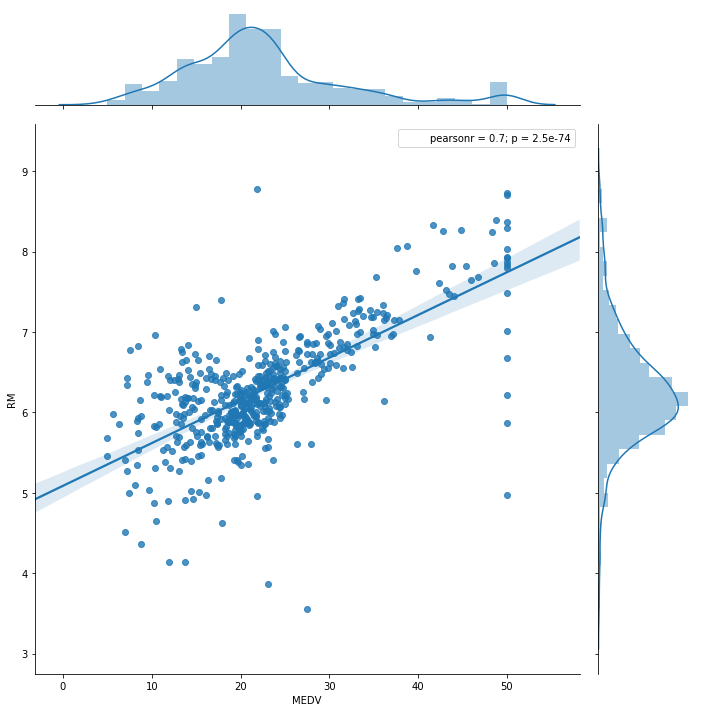

In [52]:
sns.jointplot(x='MEDV', y='RM', data=df, kind='reg', size=10);
plt.show();

In [53]:
#Robost Regression

In [54]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [56]:
#Random SAmple Consensus (RANSAC) Algorithm

#Select min_samples random samples from the original data and check whether the set of data is valid(see is_data_valid)
#Fit a model to the random subset(base_estimator.fit) and check whether the estimated model is valid(see is_model_valid)
#Classify all data as inliers or outliers by calculating the sesiduals to the estimated model(base_estimator.predict(x) - y) -
#all samples with absolute residuals smaller than the residual_threshold are considered inliers.
#Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number
#of inliers, it is only considered as the best model if it has better score.

In [57]:
Z = df['RM'].values.reshape(-1,1)
w = df['MEDV'].values

In [58]:
ransac = RANSACRegressor()

In [59]:
ransac.fit(Z,w)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [62]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [67]:
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [64]:
line_Z = np.arange(3,10,1)
line_w_ransac = ransac.predict(line_Z.reshape(-1,1))

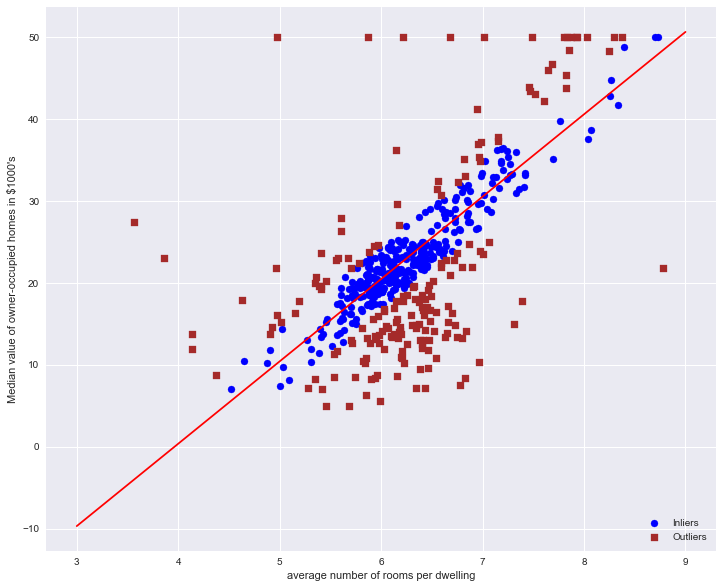

In [74]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10))

plt.scatter(Z[inlier_mask], w[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(Z[outlier_mask], w[outlier_mask], c='brown', marker='s', label='Outliers')

plt.plot(line_Z, line_w_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='lower right')
plt.show()


In [75]:
ransac.estimator_.coef_

array([ 10.06096569])

In [76]:
ransac.estimator_.intercept_

-39.869883882698176